In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

warnings.filterwarnings("ignore")
%matplotlib inline

## Data analysis

In [2]:
file = pd.read_csv('steps_tracker_dataset.csv')
file

,date,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters,mood
0,08/10/2022,4147,3.11,124.41,41,10.5,3.77,stressed
1,11/06/2022,323,0.24,9.69,3,6.0,1.90,sad
2,28/01/2022,6622,4.97,198.66,66,6.0,4.48,sad
3,23/03/2022,11136,8.35,334.08,111,8.0,1.08,tired
4,20/05/2022,2718,2.04,81.54,27,4.9,1.00,tired
...,...,...,...,...,...,...,...,...
495,04/05/2022,17376,13.03,521.28,174,8.0,2.86,energetic
496,16/04/2022,6917,5.19,207.51,69,4.7,0.49,sad
497,08/01/2022,12247,9.19,367.41,122,9.0,0.15,happy
498,01/03/2022,8295,6.22,248.85,83,4.8,2.39,stressed


In [3]:
# Preprocesamiento
file.drop(columns=["date"], inplace=True)  # Eliminamos la fecha, ya que no es útil para el modelo

In [4]:
# Codificar la variable objetivo (mood)
label_encoder = LabelEncoder()
file["mood"] = label_encoder.fit_transform(file["mood"])
file

,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters,mood
0,4147,3.11,124.41,41,10.5,3.77,3
1,323,0.24,9.69,3,6.0,1.90,2
2,6622,4.97,198.66,66,6.0,4.48,2
3,11136,8.35,334.08,111,8.0,1.08,4
4,2718,2.04,81.54,27,4.9,1.00,4
...,...,...,...,...,...,...,...
495,17376,13.03,521.28,174,8.0,2.86,0
496,6917,5.19,207.51,69,4.7,0.49,2
497,12247,9.19,367.41,122,9.0,0.15,1
498,8295,6.22,248.85,83,4.8,2.39,3


In [5]:
correlation = round(file.corr(), 10) 
display(np.abs(correlation['mood']))

steps                  0.012186
distance_km            0.012180
calories_burned        0.012186
active_minutes         0.011942
sleep_hours            0.030004
water_intake_liters    0.080542
mood                   1.000000
Name: mood, dtype: float64

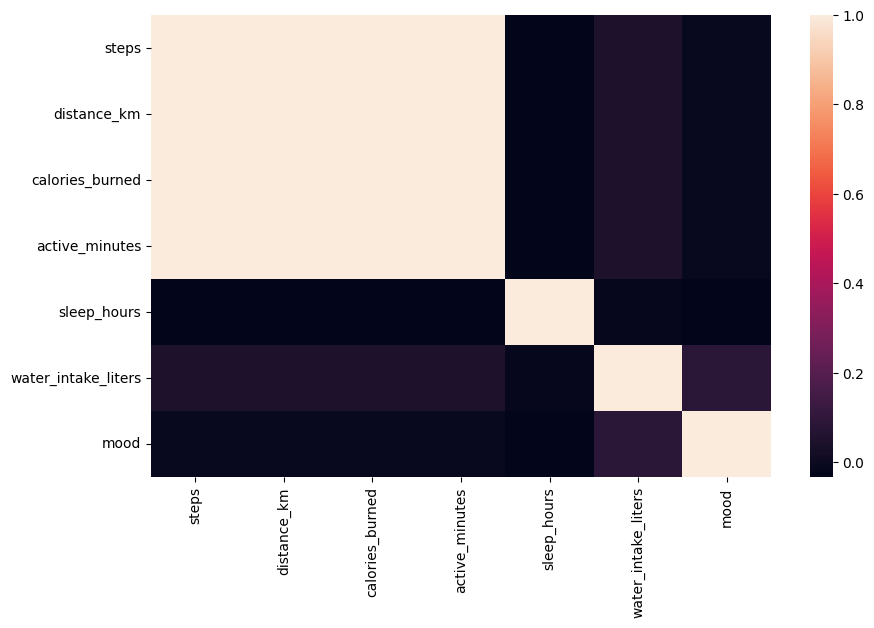

In [6]:
plt.figure(figsize = (10, 6))
sns.heatmap(correlation)
plt.show()

In [7]:
# Separar características y etiqueta
X = file.drop(columns=["mood"])
y = file["mood"]

In [8]:
X

,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters
0,4147,3.11,124.41,41,10.5,3.77
1,323,0.24,9.69,3,6.0,1.90
2,6622,4.97,198.66,66,6.0,4.48
3,11136,8.35,334.08,111,8.0,1.08
4,2718,2.04,81.54,27,4.9,1.00
...,...,...,...,...,...,...
495,17376,13.03,521.28,174,8.0,2.86
496,6917,5.19,207.51,69,4.7,0.49
497,12247,9.19,367.41,122,9.0,0.15
498,8295,6.22,248.85,83,4.8,2.39


In [9]:
y

0      3
1      2
2      2
3      4
4      4
      ..
495    0
496    2
497    1
498    3
499    2
Name: mood, Length: 500, dtype: int64

## Model training

In [10]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Normalización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model test

In [13]:
# Evaluación
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.17
              precision    recall  f1-score   support

   energetic       0.18      0.17      0.17        18
       happy       0.20      0.22      0.21        23
         sad       0.31      0.21      0.25        19
    stressed       0.19      0.18      0.19        22
       tired       0.04      0.06      0.05        18

    accuracy                           0.17       100
   macro avg       0.18      0.17      0.17       100
weighted avg       0.19      0.17      0.18       100



In [15]:
# ---- Permitir entrada de nuevos datos ----
def predict_new_data():
    print("\nIngrese nuevos datos para predecir el estado de ánimo:")
    
    new_data = {
        "steps": int(input("Pasos caminados: ")),
        "distance_km": float(input("Distancia recorrida (km): ")),
        "calories_burned": float(input("Calorías quemadas: ")),
        "active_minutes": int(input("Minutos activos: ")),
        "sleep_hours": float(input("Horas de sueño: ")),
        "water_intake_liters": float(input("Litros de agua consumidos: "))
    }
    
    # Convertir a DataFrame
    new_df = pd.DataFrame([new_data])
    new_df = scaler.transform(new_df)  # Aplicar normalización
    
    # Predecir
    predicted_mood = model.predict(new_df)[0]
    print(f"\nEstado de ánimo estimado: {label_encoder.inverse_transform([predicted_mood])[0]}")

# Llamar a la función para probar la predicción con nuevos datos
predict_new_data()


Ingrese nuevos datos para predecir el estado de ánimo:


Pasos caminados:  12
Distancia recorrida (km):  5.56
Calorías quemadas:  45
Minutos activos:  450
Horas de sueño:  8
Litros de agua consumidos:  34



Estado de ánimo estimado: stressed
